In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from pathlib import Path
from skimage.io import imread
from skimage.color import label2rgb
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
malaria_dir = Path('../input/malaria/malaria/')

In [ ]:
train_df = pd.read_json(malaria_dir / 'training.json')
train_df['path'] = train_df['image'].map(lambda x: malaria_dir / x['pathname'][1:])
train_df['image_available'] = train_df['path'].map(lambda x: x.exists())
print(train_df.shape[0], 'images')
train_df = train_df.query('image_available')
print(train_df.shape[0], 'images available')
train_df.sample(5)

### Object Breakdown
We can breakdown by the counts of various objects

In [52]:
object_df = pd.DataFrame([dict(image=c_row['path'], **c_item) for _, c_row in train_df.iterrows() for c_item in c_row['objects']])
cat_dict = {v:k for k,v in enumerate(object_df['category'].value_counts().index, 1)}
print(object_df['category'].value_counts())
object_df.sample(3)

red blood cell    77420
trophozoite        1473
difficult           441
ring                353
schizont            179
gametocyte          144
leukocyte           103
Name: category, dtype: int64


,bounding_box,category,image
25896,"{'minimum': {'r': 619, 'c': 588}, 'maximum': {...",red blood cell,../input/malaria/malaria/images/4811fdf2-d7e8-...
57233,"{'minimum': {'r': 506, 'c': 1336}, 'maximum': ...",red blood cell,../input/malaria/malaria/images/ca5e6a15-ba65-...
50759,"{'minimum': {'r': 853, 'c': 721}, 'maximum': {...",red blood cell,../input/malaria/malaria/images/db0a1123-0b35-...


# Load and Preview
Here we can load and preview a single row

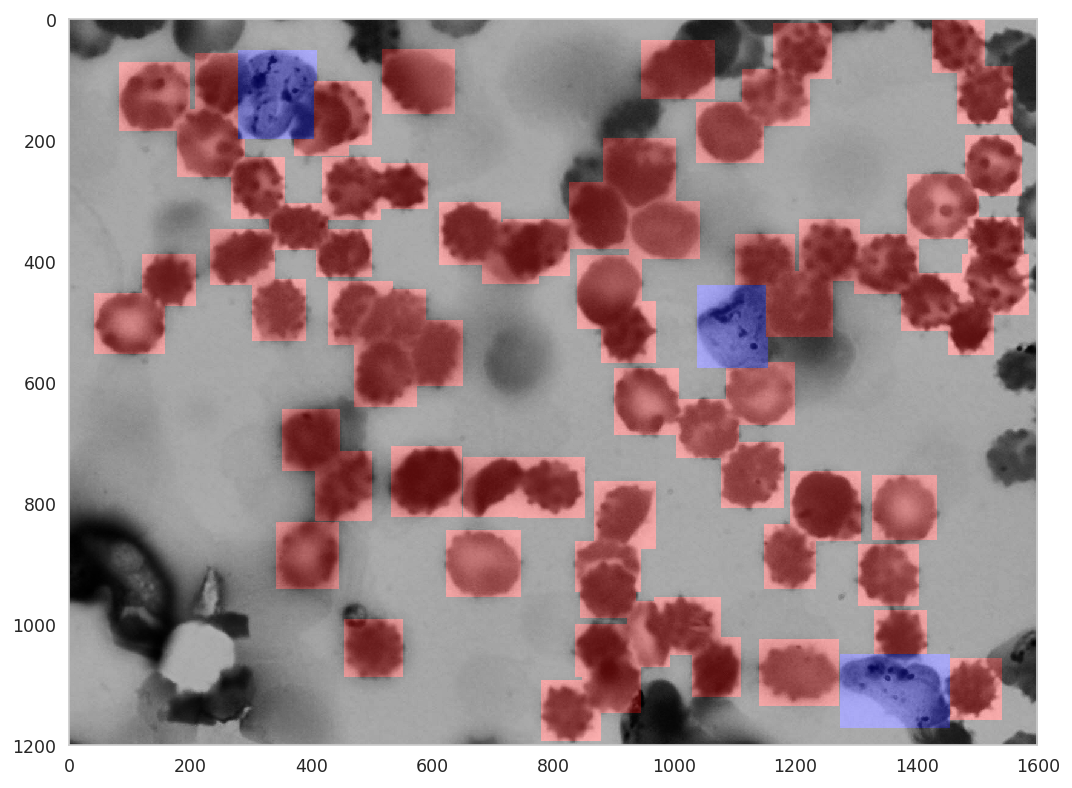

In [53]:
test_row = train_df.iloc[0]
def show_image_boxes(in_row, ax=None):
    """Show a row with bounding boxes"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    c_img = imread(in_row['path'])
    lab_img = np.zeros((c_img.shape[0], c_img.shape[1]), dtype='int')
    for c_obj in in_row['objects']:
        min_val = c_obj['bounding_box']['minimum']
        max_val = c_obj['bounding_box']['maximum']
        lab_id = cat_dict.get(c_obj['category'], 20)
        lab_img[slice(min_val['r'], max_val['r']), slice(min_val['c'], max_val['c'])] = lab_id
    ax.imshow(label2rgb(label=lab_img, image=c_img, bg_label=0))
show_image_boxes(test_row)

In [ ]:
fig, m_axs = plt.subplots(3, 3, figsize=(30, 30))
valid_img_list = object_df.groupby('category').apply(lambda x: x.sample(2)).reset_index(drop=True)['image'].values.tolist()
for c_ax, (_, c_row) in zip(m_axs.flatten(), train_df[train_df['path'].isin(valid_img_list)].iterrows()):
    show_image_boxes(c_row, ax=c_ax)

In [ ]:
fig.savefig('overlay_figure.png')